In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
df = pd.read_csv("/content/Iris.csv")

In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
print("Number of rows are: ",df.shape[0])
print("Number of columns are: ",df.shape[1])

Number of rows are:  150
Number of columns are:  6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
dup = df.duplicated().sum()
print(f'number of duplicated rows are {dup}')

number of duplicated rows are 0


In [ ]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
df.describe(include= 'all').round(2)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.00,150.00,150.00,150.00,150.00,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.50,5.84,3.05,3.76,1.20,NaN
std,43.45,0.83,0.43,1.76,0.76,NaN
min,1.00,4.30,2.00,1.00,0.10,NaN
25%,38.25,5.10,2.80,1.60,0.30,NaN
50%,75.50,5.80,3.00,4.35,1.30,NaN
75%,112.75,6.40,3.30,5.10,1.80,NaN


In [ ]:
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())

No. of unique values in Id is 150
No. of unique values in SepalLengthCm is 35
No. of unique values in SepalWidthCm is 23
No. of unique values in PetalLengthCm is 43
No. of unique values in PetalWidthCm is 22
No. of unique values in Species is 3


In [ ]:
data=df.iloc[:,1:]

In [ ]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


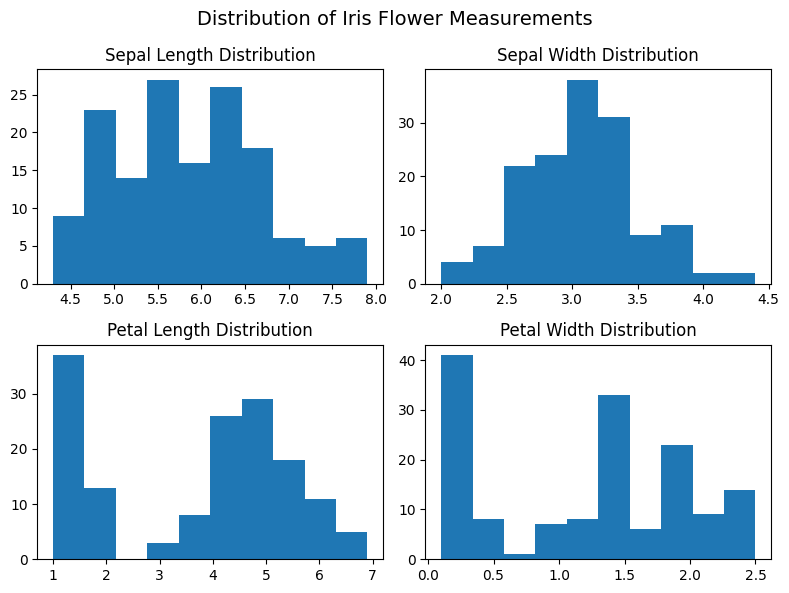

In [ ]:
plt.figure(figsize=(8, 6))
plt.suptitle('Distribution of Iris Flower Measurements', fontsize=14)

# Create a 2x2 grid of subplots
plt.subplot(2, 2, 1)  # Subplot 1 (Top-Left)
plt.hist(data['SepalLengthCm'])
plt.title('Sepal Length Distribution')

plt.subplot(2, 2, 2)  # Subplot 2 (Top-Right)
plt.hist(data['SepalWidthCm'])
plt.title('Sepal Width Distribution')

plt.subplot(2, 2, 3)  # Subplot 3 (Bottom-Left)
plt.hist(data['PetalLengthCm'])
plt.title('Petal Length Distribution')

plt.subplot(2, 2, 4)  # Subplot 4 (Bottom-Right)
plt.hist(data['PetalWidthCm'])
plt.title('Petal Width Distribution')

# Display the subplots
plt.tight_layout()  # Helps in adjusting the layout
plt.show()

In [ ]:
colors = ['red', 'yellow', 'green']
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

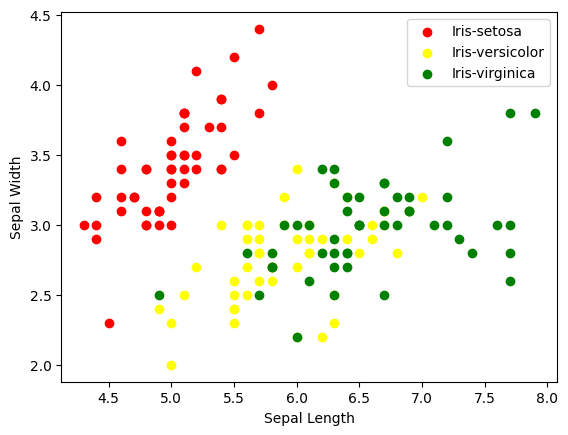

In [ ]:
for i in range(3):
    # Select data for the current species.
    x = data[data['Species'] == species[i]]

    # Create a scatter plot with the specified color and label for the current species.
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c=colors[i], label=species[i])

# Add labels to the x and y axes.
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

# Add a legend to identify species based on colors.
plt.legend()

# Display the scatter plot.
plt.show()

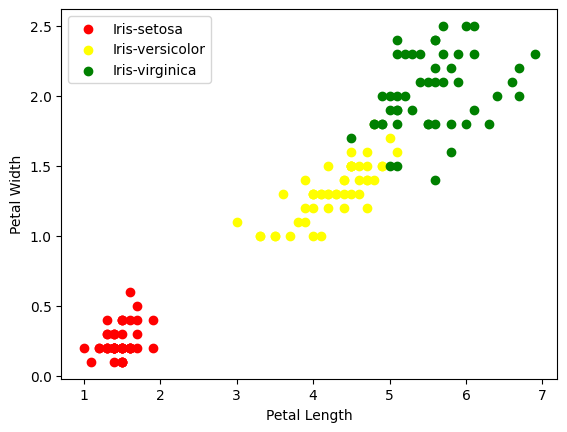

In [ ]:
for i in range(3):
    # Select data for the current species.
    x = data[data['Species'] == species[i]]

    # Create a scatter plot with the specified color and label for the current species.
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c=colors[i], label=species[i])

# Add labels to the x and y axes.
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

# Add a legend to identify species based on colors.
plt.legend()

# Display the scatter plot.
plt.show()

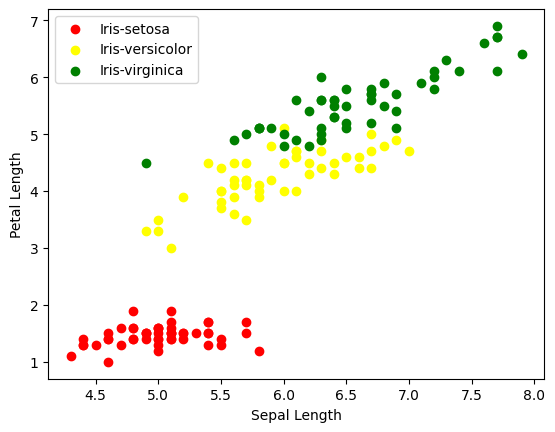

In [ ]:
for i in range(3):
    # Select data for the current species.
    x = data[data['Species'] == species[i]]

    # Create a scatter plot with the specified color and label for the current species.
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c=colors[i], label=species[i])

# Add labels to the x and y axes.
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')

# Add a legend to identify species based on colors.
plt.legend()

# Display the scatter plot.
plt.show()

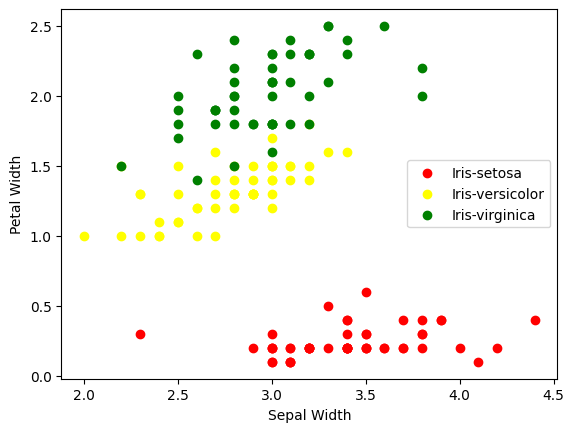

In [ ]:
for i in range(3):
    # Select data for the current species.
    x = data[data['Species'] == species[i]]

    # Create a scatter plot with the specified color and label for the current species.
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c=colors[i], label=species[i])

# Add labels to the x and y axes.
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')

# Add a legend to identify species based on colors.
plt.legend()

# Display the scatter plot.
plt.show()

In [ ]:
le = LabelEncoder()

# Encode the 'Species' column to convert the species names to numerical labels
data['Species'] = le.fit_transform(data['Species'])

# Check the unique values in the 'Species' column after encoding
unique_species = data['Species'].unique()

# Display the unique encoded values
print("Encoded Species Values:")
print(unique_species) # 'Iris-setosa' == 0, 'Iris-versicolor' == 1, 'Iris-virginica' == 2

Encoded Species Values:
[0 1 2]


In [ ]:
x=data.drop(columns=['Species'], axis=1)
y=data['Species']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3)

In [ ]:
y_train.value_counts()

Species
1    39
0    35
2    31
Name: count, dtype: int64

In [ ]:
def evaluate_model(model, x_train, x_test, y_train, y_test):
    '''The function will take model, x train, x test, y train, y test
    and then it will fit the model, then make predictions on the trained model,
    it will then print roc-auc score of train and test, then plot the roc, auc curve,
    print confusion matrix for train and test, then print classification report for train and test,
    then plot the feature importances if the model has feature importances,
    and finally it will return the following scores as a list:
    recall_train, recall_test, acc_train, acc_test, F1_train, F1_test
    '''

    # Fit the model to the training data.
    model.fit(x_train, y_train)

    # make predictions on the test data
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    # calculate confusion matrix
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)

    fig, ax = plt.subplots(1, 2, figsize=(11,4))

    print("\nConfusion Matrix:")
    sns.heatmap(cm_train, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[0])
    ax[0].set_xlabel("Predicted Label")
    ax[0].set_ylabel("True Label")
    ax[0].set_title("Train Confusion Matrix")

    sns.heatmap(cm_test, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[1])
    ax[1].set_xlabel("Predicted Label")
    ax[1].set_ylabel("True Label")
    ax[1].set_title("Test Confusion Matrix")

    plt.tight_layout()
    plt.show()


    # calculate classification report
    cr_train = classification_report(y_train, y_pred_train, output_dict=True)
    cr_test = classification_report(y_test, y_pred_test, output_dict=True)
    print("\nTrain Classification Report:")
    crt = pd.DataFrame(cr_train).T
    print(crt.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_train).T.iloc[:, :-1], annot=True, cmap="Blues")
    print("\nTest Classification Report:")
    crt2 = pd.DataFrame(cr_test).T
    print(crt2.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_test).T.iloc[:, :-1], annot=True, cmap="Blues")

    precision_train = cr_train['weighted avg']['precision']
    precision_test = cr_test['weighted avg']['precision']

    recall_train = cr_train['weighted avg']['recall']
    recall_test = cr_test['weighted avg']['recall']

    acc_train = accuracy_score(y_true = y_train, y_pred = y_pred_train)
    acc_test = accuracy_score(y_true = y_test, y_pred = y_pred_test)

    F1_train = cr_train['weighted avg']['f1-score']
    F1_test = cr_test['weighted avg']['f1-score']

    model_score = [precision_train, precision_test, recall_train, recall_test, acc_train, acc_test, F1_train, F1_test ]
    return model_score

In [ ]:
score = pd.DataFrame(index = ['Precision Train', 'Precision Test','Recall Train','Recall Test','Accuracy Train', 'Accuracy Test', 'F1 macro Train', 'F1 macro Test'])

In [ ]:
lr_model = LogisticRegression(fit_intercept=True, max_iter=10000)


Confusion Matrix:


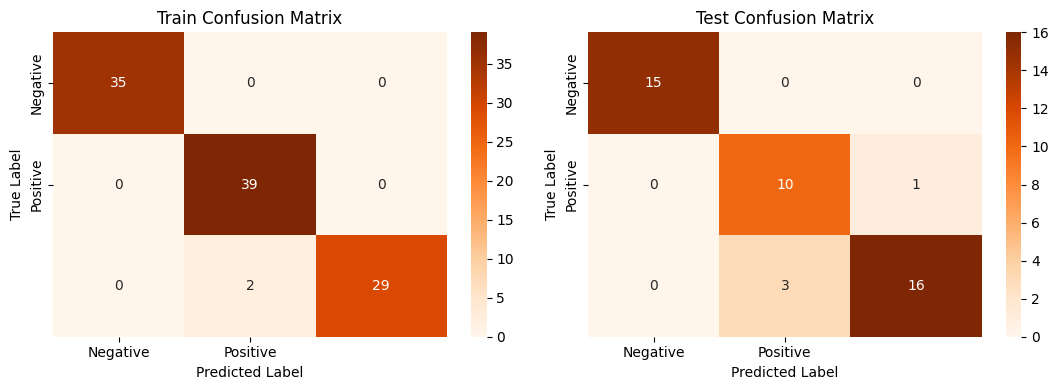


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  35        |
| 1            |    0.95122  | 1        |   0.975    |  39        |
| 2            |    1        | 0.935484 |   0.966667 |  31        |
| accuracy     |    0.980952 | 0.980952 |   0.980952 |   0.980952 |
| macro avg    |    0.98374  | 0.978495 |   0.980556 | 105        |
| weighted avg |    0.981882 | 0.980952 |   0.980873 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 15        |
| 1            |    0.769231 | 0.909091 |   0.833333 | 11        |
| 2            |    0.941176 | 0.842105 |   0.888889 | 19        |
| accuracy     |    0.911111 | 0.911111 |   0.911111 |  0.9111

In [ ]:
lr_score = evaluate_model(lr_model, x_train, x_test, y_train, y_test)

In [ ]:
score['Logistic regression'] = lr_score
score

,Logistic regression
Precision Train,0.981882
Precision Test,0.918753
Recall Train,0.980952
Recall Test,0.911111
Accuracy Train,0.980952
Accuracy Test,0.911111
F1 macro Train,0.980873
F1 macro Test,0.912346


from matplotlib import pyplot as plt
score['Logistic regression'].plot(kind='hist', bins=20, title='Logistic regression')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
score['Logistic regression'].plot(kind='line', figsize=(8, 4), title='Logistic regression')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
param_grid = {'C': [100,10,1,0.1,0.01,0.001,0.0001],
              'penalty': ['l1', 'l2'],
              'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

# Initializing the logistic regression model
logreg = LogisticRegression(fit_intercept=True, max_iter=10000, random_state=0)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=4, random_state=0)

# Using GridSearchCV to tune the hyperparameters using cross-validation
grid = GridSearchCV(logreg, param_grid, cv=rskf)
grid.fit(x_train, y_train)

# Select the best hyperparameters found by GridSearchCV
best_params = grid.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'C': 10, 'penalty': 'l2', 'solver': 'saga'}


In [ ]:
lr_model2 = LogisticRegression(C=best_params['C'],
                                  penalty=best_params['penalty'],
                                  solver=best_params['solver'],
                                  max_iter=10000, random_state=0)


Confusion Matrix:


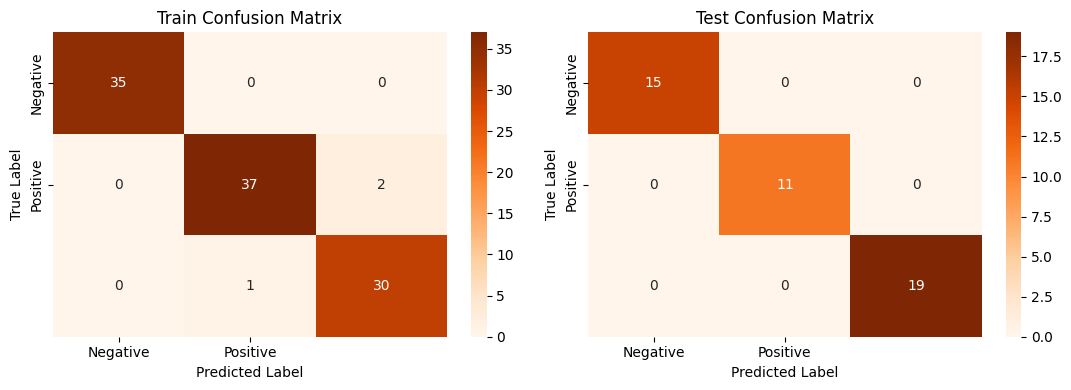


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  35        |
| 1            |    0.973684 | 0.948718 |   0.961039 |  39        |
| 2            |    0.9375   | 0.967742 |   0.952381 |  31        |
| accuracy     |    0.971429 | 0.971429 |   0.971429 |   0.971429 |
| macro avg    |    0.970395 | 0.972153 |   0.97114  | 105        |
| weighted avg |    0.971773 | 0.971429 |   0.97147  | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        15 |
| 1            |           1 |        1 |          1 |        11 |
| 2            |           1 |        1 |          1 |        19 |
| accuracy     |           1 |        1 |          1 |        

In [ ]:
lr_score2 = evaluate_model(lr_model2, x_train, x_test, y_train, y_test)

In [ ]:
score['Logistic regression tuned'] = lr_score2

In [ ]:
score

,Logistic regression,Logistic regression tuned
Precision Train,0.981882,0.971773
Precision Test,0.918753,1.000000
Recall Train,0.980952,0.971429
Recall Test,0.911111,1.000000
Accuracy Train,0.980952,0.971429
Accuracy Test,0.911111,1.000000
F1 macro Train,0.980873,0.971470
F1 macro Test,0.912346,1.000000


from matplotlib import pyplot as plt
score['Logistic regression'].plot(kind='hist', bins=20, title='Logistic regression')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
score['Logistic regression tuned'].plot(kind='hist', bins=20, title='Logistic regression tuned')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
score.plot(kind='scatter', x='Logistic regression', y='Logistic regression tuned', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
score['Logistic regression'].plot(kind='line', figsize=(8, 4), title='Logistic regression')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
score['Logistic regression tuned'].plot(kind='line', figsize=(8, 4), title='Logistic regression tuned')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
dt_model = DecisionTreeClassifier(random_state=20)


Confusion Matrix:


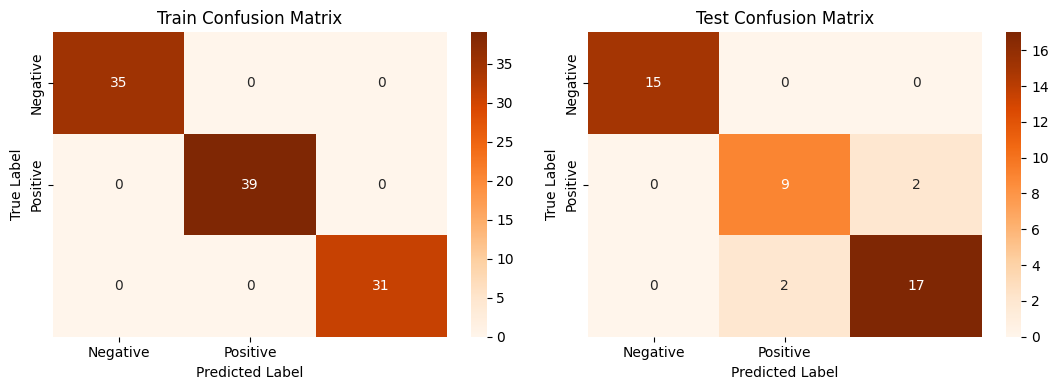


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        35 |
| 1            |           1 |        1 |          1 |        39 |
| 2            |           1 |        1 |          1 |        31 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |       105 |
| weighted avg |           1 |        1 |          1 |       105 |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 15        |
| 1            |    0.818182 | 0.818182 |   0.818182 | 11        |
| 2            |    0.894737 | 0.894737 |   0.894737 | 19        |
| accuracy     |    0.911111 | 0.911111 |   0.911111 |  0.911111 |
| m

In [ ]:
dt_score = evaluate_model(dt_model, x_train, x_test, y_train, y_test)

In [ ]:
score['Decision Tree'] = dt_score
score

,Logistic regression,Logistic regression tuned,Decision Tree
Precision Train,0.981882,0.971773,1.000000
Precision Test,0.918753,1.000000,0.911111
Recall Train,0.980952,0.971429,1.000000
Recall Test,0.911111,1.000000,0.911111
Accuracy Train,0.980952,0.971429,1.000000
Accuracy Test,0.911111,1.000000,0.911111
F1 macro Train,0.980873,0.971470,1.000000
F1 macro Test,0.912346,1.000000,0.911111


from matplotlib import pyplot as plt
score['Logistic regression'].plot(kind='hist', bins=20, title='Logistic regression')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
score['Logistic regression tuned'].plot(kind='hist', bins=20, title='Logistic regression tuned')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
score['Decision Tree'].plot(kind='hist', bins=20, title='Decision Tree')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
score.plot(kind='scatter', x='Logistic regression', y='Logistic regression tuned', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
score.plot(kind='scatter', x='Logistic regression tuned', y='Decision Tree', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
score['Logistic regression'].plot(kind='line', figsize=(8, 4), title='Logistic regression')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
score['Logistic regression tuned'].plot(kind='line', figsize=(8, 4), title='Logistic regression tuned')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
score['Decision Tree'].plot(kind='line', figsize=(8, 4), title='Decision Tree')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
grid = {'max_depth' : [3,4,5,6,7,8],
        'min_samples_split' : np.arange(2,8),
        'min_samples_leaf' : np.arange(10,20)}

# Initialize the model
model = DecisionTreeClassifier()

# repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize GridSearchCV
grid_search = GridSearchCV(model, grid, cv=rskf)

# Fit the GridSearchCV to the training data
grid_search.fit(x_train, y_train)

# Select the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'max_depth': 3, 'min_samples_leaf': 10, 'min_samples_split': 2}


In [ ]:
dt_model2 = DecisionTreeClassifier(max_depth=best_params['max_depth'],
                                 min_samples_leaf=best_params['min_samples_leaf'],
                                 min_samples_split=best_params['min_samples_split'],
                                 random_state=20)


Confusion Matrix:


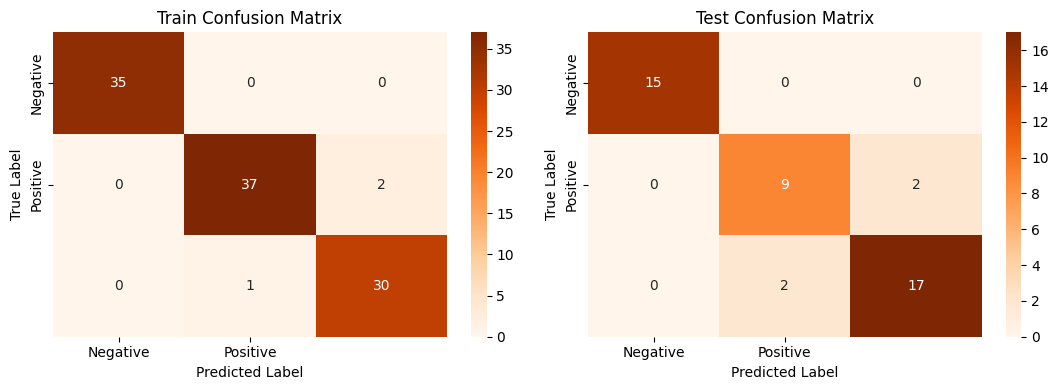


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  35        |
| 1            |    0.973684 | 0.948718 |   0.961039 |  39        |
| 2            |    0.9375   | 0.967742 |   0.952381 |  31        |
| accuracy     |    0.971429 | 0.971429 |   0.971429 |   0.971429 |
| macro avg    |    0.970395 | 0.972153 |   0.97114  | 105        |
| weighted avg |    0.971773 | 0.971429 |   0.97147  | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 15        |
| 1            |    0.818182 | 0.818182 |   0.818182 | 11        |
| 2            |    0.894737 | 0.894737 |   0.894737 | 19        |
| accuracy     |    0.911111 | 0.911111 |   0.911111 |  0.9111

In [ ]:
dt2_score = evaluate_model(dt_model2, x_train, x_test, y_train, y_test)

In [ ]:
score['Decision Tree tuned'] = dt2_score

In [ ]:
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned
Precision Train,0.981882,0.971773,1.000000,0.971773
Precision Test,0.918753,1.000000,0.911111,0.911111
Recall Train,0.980952,0.971429,1.000000,0.971429
Recall Test,0.911111,1.000000,0.911111,0.911111
Accuracy Train,0.980952,0.971429,1.000000,0.971429
Accuracy Test,0.911111,1.000000,0.911111,0.911111
F1 macro Train,0.980873,0.971470,1.000000,0.971470
F1 macro Test,0.912346,1.000000,0.911111,0.911111


from matplotlib import pyplot as plt
score['Logistic regression'].plot(kind='hist', bins=20, title='Logistic regression')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
score['Logistic regression tuned'].plot(kind='hist', bins=20, title='Logistic regression tuned')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
score['Decision Tree'].plot(kind='hist', bins=20, title='Decision Tree')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
score['Decision Tree tuned'].plot(kind='hist', bins=20, title='Decision Tree tuned')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
score.plot(kind='scatter', x='Logistic regression', y='Logistic regression tuned', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
score.plot(kind='scatter', x='Logistic regression tuned', y='Decision Tree', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
score.plot(kind='scatter', x='Decision Tree', y='Decision Tree tuned', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
score['Logistic regression'].plot(kind='line', figsize=(8, 4), title='Logistic regression')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
score['Logistic regression tuned'].plot(kind='line', figsize=(8, 4), title='Logistic regression tuned')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
score['Decision Tree'].plot(kind='line', figsize=(8, 4), title='Decision Tree')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
score['Decision Tree tuned'].plot(kind='line', figsize=(8, 4), title='Decision Tree tuned')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
rf_model = RandomForestClassifier(random_state=0)


Confusion Matrix:


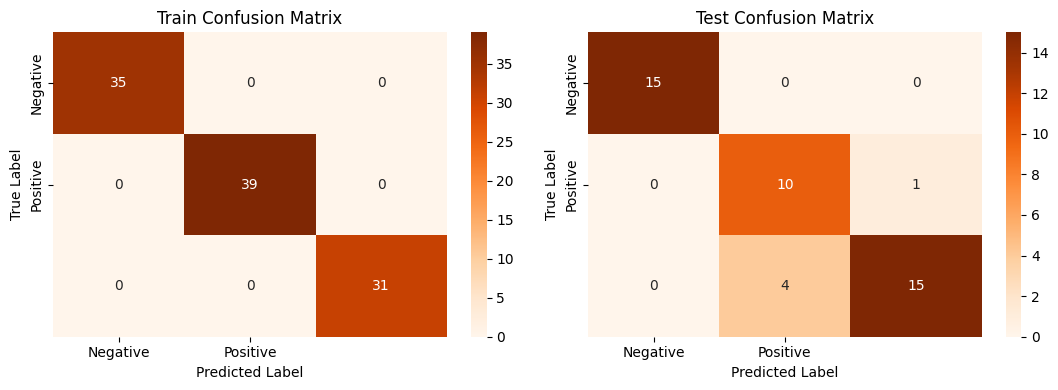


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        35 |
| 1            |           1 |        1 |          1 |        39 |
| 2            |           1 |        1 |          1 |        31 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |       105 |
| weighted avg |           1 |        1 |          1 |       105 |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 15        |
| 1            |    0.714286 | 0.909091 |   0.8      | 11        |
| 2            |    0.9375   | 0.789474 |   0.857143 | 19        |
| accuracy     |    0.888889 | 0.888889 |   0.888889 |  0.888889 |
| m

In [ ]:
rf_score = evaluate_model(rf_model, x_train, x_test, y_train, y_test)

In [ ]:
score['Random Forest'] = rf_score
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest
Precision Train,0.981882,0.971773,1.000000,0.971773,1.000000
Precision Test,0.918753,1.000000,0.911111,0.911111,0.903770
Recall Train,0.980952,0.971429,1.000000,0.971429,1.000000
Recall Test,0.911111,1.000000,0.911111,0.911111,0.888889
Accuracy Train,0.980952,0.971429,1.000000,0.971429,1.000000
Accuracy Test,0.911111,1.000000,0.911111,0.911111,0.888889
F1 macro Train,0.980873,0.971470,1.000000,0.971470,1.000000
F1 macro Test,0.912346,1.000000,0.911111,0.911111,0.890794


from matplotlib import pyplot as plt
score['Logistic regression'].plot(kind='hist', bins=20, title='Logistic regression')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
score['Logistic regression tuned'].plot(kind='hist', bins=20, title='Logistic regression tuned')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
score['Decision Tree'].plot(kind='hist', bins=20, title='Decision Tree')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
score['Decision Tree tuned'].plot(kind='hist', bins=20, title='Decision Tree tuned')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
score.plot(kind='scatter', x='Logistic regression', y='Logistic regression tuned', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
score.plot(kind='scatter', x='Logistic regression tuned', y='Decision Tree', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
score.plot(kind='scatter', x='Decision Tree', y='Decision Tree tuned', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
score.plot(kind='scatter', x='Decision Tree tuned', y='Random Forest', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
score['Logistic regression'].plot(kind='line', figsize=(8, 4), title='Logistic regression')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
score['Logistic regression tuned'].plot(kind='line', figsize=(8, 4), title='Logistic regression tuned')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
score['Decision Tree'].plot(kind='line', figsize=(8, 4), title='Decision Tree')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
score['Decision Tree tuned'].plot(kind='line', figsize=(8, 4), title='Decision Tree tuned')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
grid = {'n_estimators': [10, 50, 100, 200],
              'max_depth': [8, 9, 10, 11, 12,13, 14, 15],
              'min_samples_split': [2, 3, 4, 5]}

# Initialize the model
rf = RandomForestClassifier(random_state=0)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize RandomSearchCV
random_search = RandomizedSearchCV(rf, grid,cv=rskf, n_iter=10, n_jobs=-1)

# Fit the RandomSearchCV to the training data
random_search.fit(x_train, y_train)

# Select the best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'n_estimators': 100, 'min_samples_split': 4, 'max_depth': 9}


In [ ]:
rf_model2 = RandomForestClassifier(n_estimators = best_params['n_estimators'],
                                 min_samples_leaf= best_params['min_samples_split'],
                                 max_depth = best_params['max_depth'],
                                 random_state=0)


Confusion Matrix:


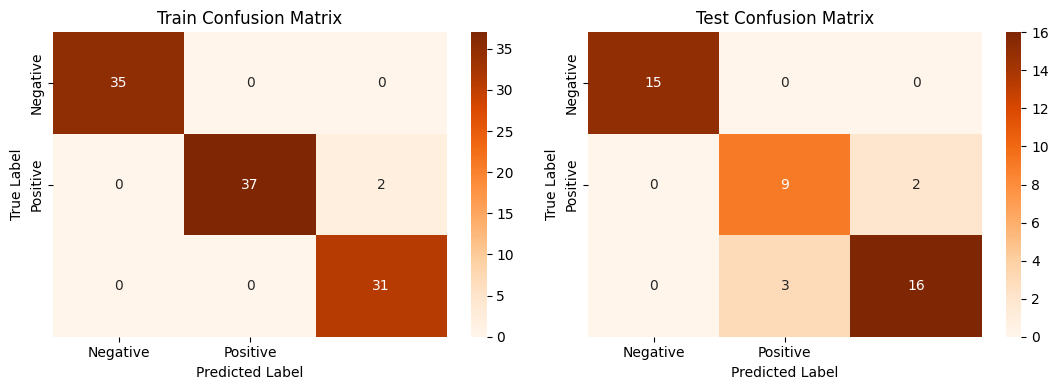


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  35        |
| 1            |    1        | 0.948718 |   0.973684 |  39        |
| 2            |    0.939394 | 1        |   0.96875  |  31        |
| accuracy     |    0.980952 | 0.980952 |   0.980952 |   0.980952 |
| macro avg    |    0.979798 | 0.982906 |   0.980811 | 105        |
| weighted avg |    0.982107 | 0.980952 |   0.980999 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 15        |
| 1            |    0.75     | 0.818182 |   0.782609 | 11        |
| 2            |    0.888889 | 0.842105 |   0.864865 | 19        |
| accuracy     |    0.888889 | 0.888889 |   0.888889 |  0.8888

In [ ]:
rf2_score = evaluate_model(rf_model2, x_train, x_test, y_train, y_test)

In [ ]:
score['Random Forest tuned'] = rf2_score

In [ ]:
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned
Precision Train,0.981882,0.971773,1.000000,0.971773,1.000000,0.982107
Precision Test,0.918753,1.000000,0.911111,0.911111,0.903770,0.891975
Recall Train,0.980952,0.971429,1.000000,0.971429,1.000000,0.980952
Recall Test,0.911111,1.000000,0.911111,0.911111,0.888889,0.888889
Accuracy Train,0.980952,0.971429,1.000000,0.971429,1.000000,0.980952
Accuracy Test,0.911111,1.000000,0.911111,0.911111,0.888889,0.888889
F1 macro Train,0.980873,0.971470,1.000000,0.971470,1.000000,0.980999
F1 macro Test,0.912346,1.000000,0.911111,0.911111,0.890794,0.889803


In [ ]:
svm_model = SVC(kernel='linear', random_state=0, probability=True)


Confusion Matrix:


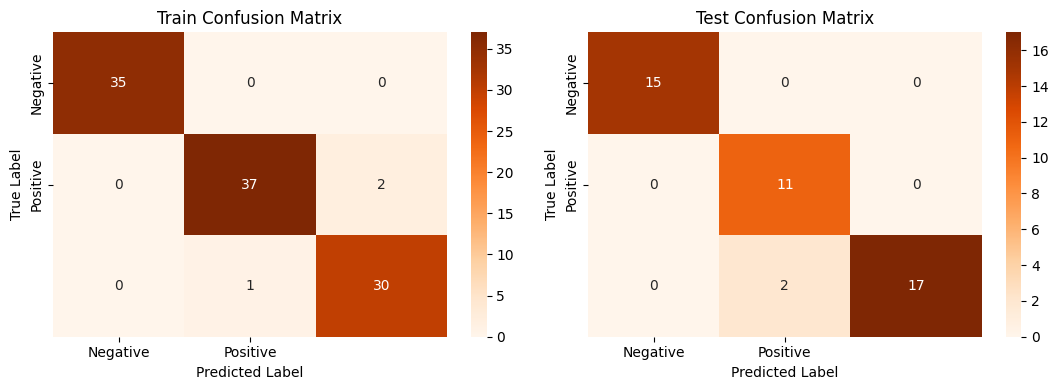


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  35        |
| 1            |    0.973684 | 0.948718 |   0.961039 |  39        |
| 2            |    0.9375   | 0.967742 |   0.952381 |  31        |
| accuracy     |    0.971429 | 0.971429 |   0.971429 |   0.971429 |
| macro avg    |    0.970395 | 0.972153 |   0.97114  | 105        |
| weighted avg |    0.971773 | 0.971429 |   0.97147  | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 15        |
| 1            |    0.846154 | 1        |   0.916667 | 11        |
| 2            |    1        | 0.894737 |   0.944444 | 19        |
| accuracy     |    0.955556 | 0.955556 |   0.955556 |  0.9555

In [ ]:
svm_score = evaluate_model(svm_model, x_train, x_test, y_train, y_test)

In [ ]:
score['SVM'] = svm_score
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM
Precision Train,0.981882,0.971773,1.000000,0.971773,1.000000,0.982107,0.971773
Precision Test,0.918753,1.000000,0.911111,0.911111,0.903770,0.891975,0.962393
Recall Train,0.980952,0.971429,1.000000,0.971429,1.000000,0.980952,0.971429
Recall Test,0.911111,1.000000,0.911111,0.911111,0.888889,0.888889,0.955556
Accuracy Train,0.980952,0.971429,1.000000,0.971429,1.000000,0.980952,0.971429
Accuracy Test,0.911111,1.000000,0.911111,0.911111,0.888889,0.888889,0.955556
F1 macro Train,0.980873,0.971470,1.000000,0.971470,1.000000,0.980999,0.971470
F1 macro Test,0.912346,1.000000,0.911111,0.911111,0.890794,0.889803,0.956173


In [ ]:
param_grid = {'C': np.arange(0.1, 10, 0.1),
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'degree': np.arange(2, 6, 1)}

# Initialize the model
svm = SVC(random_state=0, probability=True)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize RandomizedSearchCV with kfold cross-validation
random_search = RandomizedSearchCV(svm, param_grid, n_iter=10, cv=rskf, n_jobs=-1)

# Fit the RandomizedSearchCV to the training data
random_search.fit(x_train, y_train)

# Select the best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'kernel': 'linear', 'degree': 5, 'C': 9.5}


In [ ]:
svm_model2 = SVC(C = best_params['C'],
           kernel = best_params['kernel'],
           degree = best_params['degree'],
           random_state=0, probability=True)


Confusion Matrix:


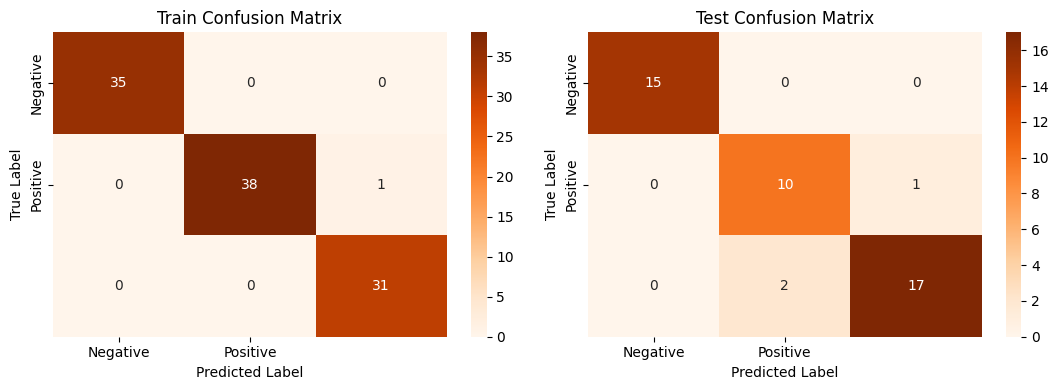


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  35        |
| 1            |    1        | 0.974359 |   0.987013 |  39        |
| 2            |    0.96875  | 1        |   0.984127 |  31        |
| accuracy     |    0.990476 | 0.990476 |   0.990476 |   0.990476 |
| macro avg    |    0.989583 | 0.991453 |   0.99038  | 105        |
| weighted avg |    0.990774 | 0.990476 |   0.99049  | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 15        |
| 1            |    0.833333 | 0.909091 |   0.869565 | 11        |
| 2            |    0.944444 | 0.894737 |   0.918919 | 19        |
| accuracy     |    0.933333 | 0.933333 |   0.933333 |  0.9333

In [ ]:
svm2_score = evaluate_model(svm_model2, x_train, x_test, y_train, y_test)

In [ ]:
score['SVM tuned'] = svm2_score

In [ ]:
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM,SVM tuned
Precision Train,0.981882,0.971773,1.000000,0.971773,1.000000,0.982107,0.971773,0.990774
Precision Test,0.918753,1.000000,0.911111,0.911111,0.903770,0.891975,0.962393,0.935802
Recall Train,0.980952,0.971429,1.000000,0.971429,1.000000,0.980952,0.971429,0.990476
Recall Test,0.911111,1.000000,0.911111,0.911111,0.888889,0.888889,0.955556,0.933333
Accuracy Train,0.980952,0.971429,1.000000,0.971429,1.000000,0.980952,0.971429,0.990476
Accuracy Test,0.911111,1.000000,0.911111,0.911111,0.888889,0.888889,0.955556,0.933333
F1 macro Train,0.980873,0.971470,1.000000,0.971470,1.000000,0.980999,0.971470,0.990490
F1 macro Test,0.912346,1.000000,0.911111,0.911111,0.890794,0.889803,0.956173,0.933882


from matplotlib import pyplot as plt
score['Logistic regression'].plot(kind='hist', bins=20, title='Logistic regression')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
score['Logistic regression tuned'].plot(kind='hist', bins=20, title='Logistic regression tuned')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
score['Decision Tree'].plot(kind='hist', bins=20, title='Decision Tree')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
score['Decision Tree tuned'].plot(kind='hist', bins=20, title='Decision Tree tuned')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
score.plot(kind='scatter', x='Logistic regression', y='Logistic regression tuned', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
score.plot(kind='scatter', x='Logistic regression tuned', y='Decision Tree', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
score.plot(kind='scatter', x='Decision Tree', y='Decision Tree tuned', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
score.plot(kind='scatter', x='Decision Tree tuned', y='Random Forest', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
score['Logistic regression'].plot(kind='line', figsize=(8, 4), title='Logistic regression')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
score['Logistic regression tuned'].plot(kind='line', figsize=(8, 4), title='Logistic regression tuned')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
score['Decision Tree'].plot(kind='line', figsize=(8, 4), title='Decision Tree')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
score['Decision Tree tuned'].plot(kind='line', figsize=(8, 4), title='Decision Tree tuned')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
xgb_model = xgb.XGBClassifier()


Confusion Matrix:


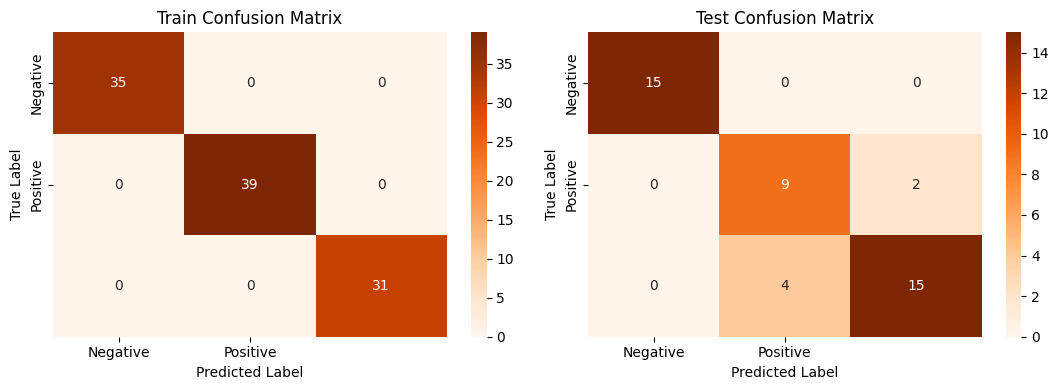


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        35 |
| 1            |           1 |        1 |          1 |        39 |
| 2            |           1 |        1 |          1 |        31 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |       105 |
| weighted avg |           1 |        1 |          1 |       105 |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 15        |
| 1            |    0.692308 | 0.818182 |   0.75     | 11        |
| 2            |    0.882353 | 0.789474 |   0.833333 | 19        |
| accuracy     |    0.866667 | 0.866667 |   0.866667 |  0.866667 |
| m

In [ ]:
xgb_score = evaluate_model(xgb_model, x_train, x_test, y_train, y_test)

In [ ]:
score['XGB'] = xgb_score
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM,SVM tuned,XGB
Precision Train,0.981882,0.971773,1.000000,0.971773,1.000000,0.982107,0.971773,0.990774,1.000000
Precision Test,0.918753,1.000000,0.911111,0.911111,0.903770,0.891975,0.962393,0.935802,0.875113
Recall Train,0.980952,0.971429,1.000000,0.971429,1.000000,0.980952,0.971429,0.990476,1.000000
Recall Test,0.911111,1.000000,0.911111,0.911111,0.888889,0.888889,0.955556,0.933333,0.866667
Accuracy Train,0.980952,0.971429,1.000000,0.971429,1.000000,0.980952,0.971429,0.990476,1.000000
Accuracy Test,0.911111,1.000000,0.911111,0.911111,0.888889,0.888889,0.955556,0.933333,0.866667
F1 macro Train,0.980873,0.971470,1.000000,0.971470,1.000000,0.980999,0.971470,0.990490,1.000000
F1 macro Test,0.912346,1.000000,0.911111,0.911111,0.890794,0.889803,0.956173,0.933882,0.868519


In [ ]:
param_grid = {'learning_rate': np.arange(0.01, 0.3, 0.01),
              'max_depth': np.arange(3, 15, 1),
              'n_estimators': np.arange(100, 200, 10)}

# Initialize the model
xgb2 = xgb.XGBClassifier(random_state=0)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(xgb2, param_grid, n_iter=10, cv=rskf)

# Fit the RandomizedSearchCV to the training data
random_search.fit(x_train, y_train)

# Select the best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'n_estimators': 180, 'max_depth': 10, 'learning_rate': 0.22}


In [ ]:
xgb_model2 = xgb.XGBClassifier(learning_rate = best_params['learning_rate'],
                                 max_depth = best_params['max_depth'],
                               n_estimators = best_params['n_estimators'],
                                 random_state=0)


Confusion Matrix:


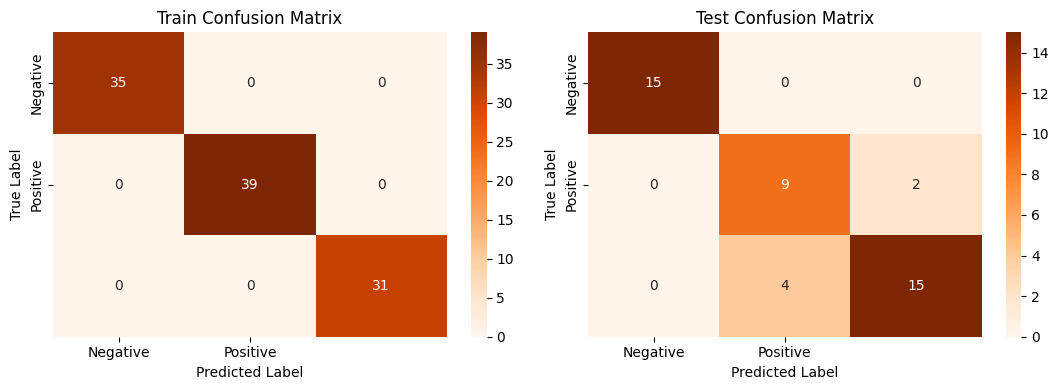


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        35 |
| 1            |           1 |        1 |          1 |        39 |
| 2            |           1 |        1 |          1 |        31 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |       105 |
| weighted avg |           1 |        1 |          1 |       105 |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 15        |
| 1            |    0.692308 | 0.818182 |   0.75     | 11        |
| 2            |    0.882353 | 0.789474 |   0.833333 | 19        |
| accuracy     |    0.866667 | 0.866667 |   0.866667 |  0.866667 |
| m

In [ ]:
xgb2_score = evaluate_model(xgb_model2, x_train, x_test, y_train, y_test)

In [ ]:
score['XGB tuned'] = xgb2_score

In [ ]:
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM,SVM tuned,XGB,XGB tuned
Precision Train,0.981882,0.971773,1.000000,0.971773,1.000000,0.982107,0.971773,0.990774,1.000000,1.000000
Precision Test,0.918753,1.000000,0.911111,0.911111,0.903770,0.891975,0.962393,0.935802,0.875113,0.875113
Recall Train,0.980952,0.971429,1.000000,0.971429,1.000000,0.980952,0.971429,0.990476,1.000000,1.000000
Recall Test,0.911111,1.000000,0.911111,0.911111,0.888889,0.888889,0.955556,0.933333,0.866667,0.866667
Accuracy Train,0.980952,0.971429,1.000000,0.971429,1.000000,0.980952,0.971429,0.990476,1.000000,1.000000
Accuracy Test,0.911111,1.000000,0.911111,0.911111,0.888889,0.888889,0.955556,0.933333,0.866667,0.866667
F1 macro Train,0.980873,0.971470,1.000000,0.971470,1.000000,0.980999,0.971470,0.990490,1.000000,1.000000
F1 macro Test,0.912346,1.000000,0.911111,0.911111,0.890794,0.889803,0.956173,0.933882,0.868519,0.868519


In [ ]:
nb_model = GaussianNB()


Confusion Matrix:


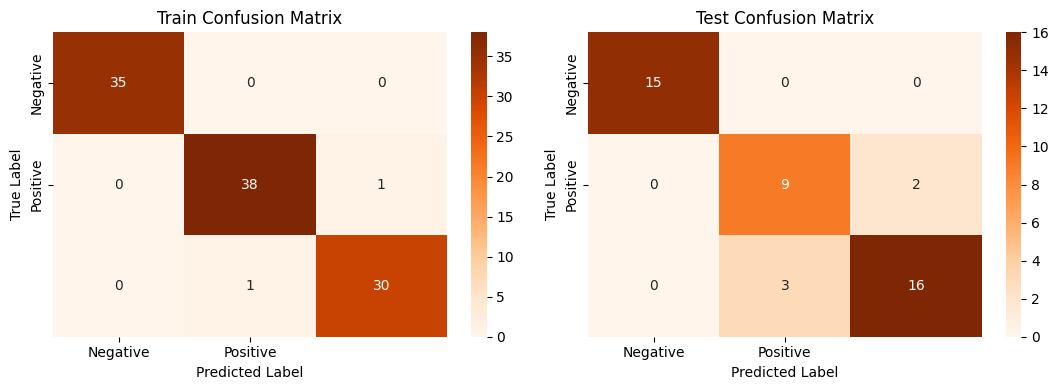


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  35        |
| 1            |    0.974359 | 0.974359 |   0.974359 |  39        |
| 2            |    0.967742 | 0.967742 |   0.967742 |  31        |
| accuracy     |    0.980952 | 0.980952 |   0.980952 |   0.980952 |
| macro avg    |    0.9807   | 0.9807   |   0.9807   | 105        |
| weighted avg |    0.980952 | 0.980952 |   0.980952 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 15        |
| 1            |    0.75     | 0.818182 |   0.782609 | 11        |
| 2            |    0.888889 | 0.842105 |   0.864865 | 19        |
| accuracy     |    0.888889 | 0.888889 |   0.888889 |  0.8888

In [ ]:
nb_score = evaluate_model(nb_model, x_train, x_test, y_train, y_test)

In [ ]:
score['Naive Bayes'] = nb_score
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM,SVM tuned,XGB,XGB tuned,Naive Bayes
Precision Train,0.981882,0.971773,1.000000,0.971773,1.000000,0.982107,0.971773,0.990774,1.000000,1.000000,0.980952
Precision Test,0.918753,1.000000,0.911111,0.911111,0.903770,0.891975,0.962393,0.935802,0.875113,0.875113,0.891975
Recall Train,0.980952,0.971429,1.000000,0.971429,1.000000,0.980952,0.971429,0.990476,1.000000,1.000000,0.980952
Recall Test,0.911111,1.000000,0.911111,0.911111,0.888889,0.888889,0.955556,0.933333,0.866667,0.866667,0.888889
Accuracy Train,0.980952,0.971429,1.000000,0.971429,1.000000,0.980952,0.971429,0.990476,1.000000,1.000000,0.980952
Accuracy Test,0.911111,1.000000,0.911111,0.911111,0.888889,0.888889,0.955556,0.933333,0.866667,0.866667,0.888889
F1 macro Train,0.980873,0.971470,1.000000,0.971470,1.000000,0.980999,0.971470,0.990490,1.000000,1.000000,0.980952
F1 macro Test,0.912346,1.000000,0.911111,0.911111,0.890794,0.889803,0.956173,0.933882,0.868519,0.868519,0.889803


In [ ]:
param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}

# Initialize the model
naive = GaussianNB()

# repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=4, n_repeats=4, random_state=0)

# Initialize GridSearchCV
GridSearch = GridSearchCV(naive, param_grid, cv=rskf, n_jobs=-1)

# Fit the GridSearchCV to the training data
GridSearch.fit(x_train, y_train)

# Select the best hyperparameters
best_params = GridSearch.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'var_smoothing': 0.004328761281083057}


In [ ]:
nb_model2 = GaussianNB(var_smoothing = best_params['var_smoothing'])


Confusion Matrix:


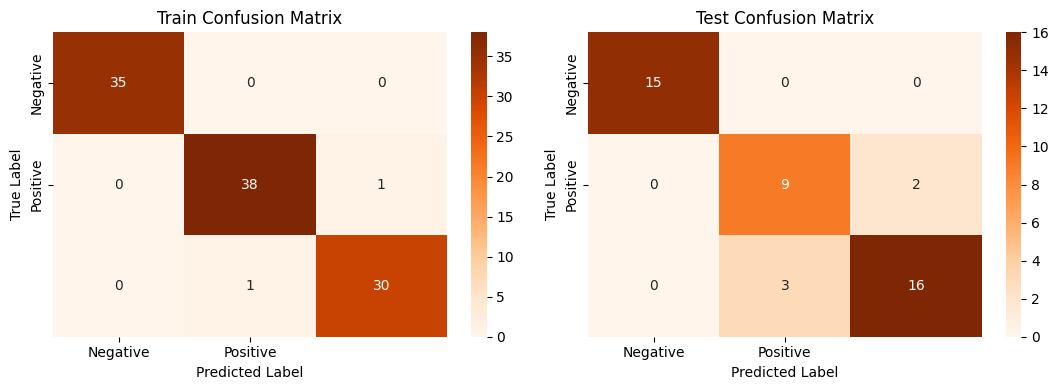


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  35        |
| 1            |    0.974359 | 0.974359 |   0.974359 |  39        |
| 2            |    0.967742 | 0.967742 |   0.967742 |  31        |
| accuracy     |    0.980952 | 0.980952 |   0.980952 |   0.980952 |
| macro avg    |    0.9807   | 0.9807   |   0.9807   | 105        |
| weighted avg |    0.980952 | 0.980952 |   0.980952 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 15        |
| 1            |    0.75     | 0.818182 |   0.782609 | 11        |
| 2            |    0.888889 | 0.842105 |   0.864865 | 19        |
| accuracy     |    0.888889 | 0.888889 |   0.888889 |  0.8888

In [ ]:
nb2_score = evaluate_model(nb_model2, x_train, x_test, y_train, y_test)

In [ ]:
score['Naive Bayes tuned']= nb2_score

In [ ]:
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM,SVM tuned,XGB,XGB tuned,Naive Bayes,Naive Bayes tuned
Precision Train,0.981882,0.971773,1.000000,0.971773,1.000000,0.982107,0.971773,0.990774,1.000000,1.000000,0.980952,0.980952
Precision Test,0.918753,1.000000,0.911111,0.911111,0.903770,0.891975,0.962393,0.935802,0.875113,0.875113,0.891975,0.891975
Recall Train,0.980952,0.971429,1.000000,0.971429,1.000000,0.980952,0.971429,0.990476,1.000000,1.000000,0.980952,0.980952
Recall Test,0.911111,1.000000,0.911111,0.911111,0.888889,0.888889,0.955556,0.933333,0.866667,0.866667,0.888889,0.888889
Accuracy Train,0.980952,0.971429,1.000000,0.971429,1.000000,0.980952,0.971429,0.990476,1.000000,1.000000,0.980952,0.980952
Accuracy Test,0.911111,1.000000,0.911111,0.911111,0.888889,0.888889,0.955556,0.933333,0.866667,0.866667,0.888889,0.888889
F1 macro Train,0.980873,0.971470,1.000000,0.971470,1.000000,0.980999,0.971470,0.990490,1.000000,1.000000,0.980952,0.980952
F1 macro Test,0.912346,1.000000,0.911111,0.911111,0.890794,0.889803,0.956173,0.933882,0.868519,0.868519,0.889803,0.889803


In [ ]:
nn_model = MLPClassifier(random_state=0)


Confusion Matrix:


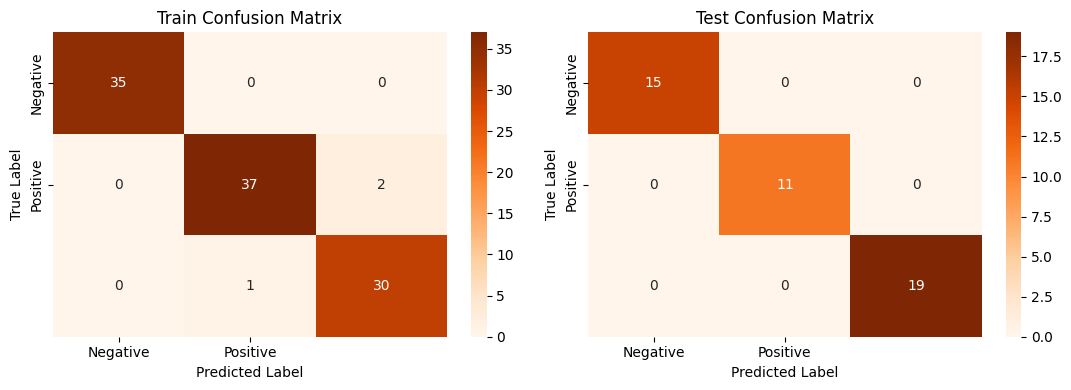


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  35        |
| 1            |    0.973684 | 0.948718 |   0.961039 |  39        |
| 2            |    0.9375   | 0.967742 |   0.952381 |  31        |
| accuracy     |    0.971429 | 0.971429 |   0.971429 |   0.971429 |
| macro avg    |    0.970395 | 0.972153 |   0.97114  | 105        |
| weighted avg |    0.971773 | 0.971429 |   0.97147  | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        15 |
| 1            |           1 |        1 |          1 |        11 |
| 2            |           1 |        1 |          1 |        19 |
| accuracy     |           1 |        1 |          1 |        

In [ ]:
neural_score = evaluate_model(nn_model, x_train, x_test, y_train, y_test)

In [ ]:
score['Neural Network'] = neural_score
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM,SVM tuned,XGB,XGB tuned,Naive Bayes,Naive Bayes tuned,Neural Network
Precision Train,0.981882,0.971773,1.000000,0.971773,1.000000,0.982107,0.971773,0.990774,1.000000,1.000000,0.980952,0.980952,0.971773
Precision Test,0.918753,1.000000,0.911111,0.911111,0.903770,0.891975,0.962393,0.935802,0.875113,0.875113,0.891975,0.891975,1.000000
Recall Train,0.980952,0.971429,1.000000,0.971429,1.000000,0.980952,0.971429,0.990476,1.000000,1.000000,0.980952,0.980952,0.971429
Recall Test,0.911111,1.000000,0.911111,0.911111,0.888889,0.888889,0.955556,0.933333,0.866667,0.866667,0.888889,0.888889,1.000000
Accuracy Train,0.980952,0.971429,1.000000,0.971429,1.000000,0.980952,0.971429,0.990476,1.000000,1.000000,0.980952,0.980952,0.971429
Accuracy Test,0.911111,1.000000,0.911111,0.911111,0.888889,0.888889,0.955556,0.933333,0.866667,0.866667,0.888889,0.888889,1.000000
F1 macro Train,0.980873,0.971470,1.000000,0.971470,1.000000,0.980999,0.971470,0.990490,1.000000,1.000000,0.980952,0.980952,0.971470
F1 macro Test,0.912346,1.000000,0.911111,0.911111,0.890794,0.889803,0.956173,0.933882,0.868519,0.868519,0.889803,0.889803,1.000000


from matplotlib import pyplot as plt
score['Logistic regression'].plot(kind='hist', bins=20, title='Logistic regression')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
score['Logistic regression tuned'].plot(kind='hist', bins=20, title='Logistic regression tuned')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
score['Decision Tree'].plot(kind='hist', bins=20, title='Decision Tree')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
score['Decision Tree tuned'].plot(kind='hist', bins=20, title='Decision Tree tuned')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
score.plot(kind='scatter', x='Logistic regression', y='Logistic regression tuned', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
score.plot(kind='scatter', x='Logistic regression tuned', y='Decision Tree', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
score.plot(kind='scatter', x='Decision Tree', y='Decision Tree tuned', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
score.plot(kind='scatter', x='Decision Tree tuned', y='Random Forest', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
score['Logistic regression'].plot(kind='line', figsize=(8, 4), title='Logistic regression')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
score['Logistic regression tuned'].plot(kind='line', figsize=(8, 4), title='Logistic regression tuned')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
score['Decision Tree'].plot(kind='line', figsize=(8, 4), title='Decision Tree')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
score['Decision Tree tuned'].plot(kind='line', figsize=(8, 4), title='Decision Tree tuned')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
param_grid = {'hidden_layer_sizes': np.arange(10, 100, 10),
              'alpha': np.arange(0.0001, 0.01, 0.0001)}

# Initialize the model
neural = MLPClassifier(random_state=0)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(neural, param_grid, n_iter=10, cv=rskf, n_jobs=-1)

# Fit the RandomizedSearchCV to the training data
random_search.fit(x_train, y_train)

# Select the best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'hidden_layer_sizes': 70, 'alpha': 0.0029}


In [ ]:
nn_model2 = MLPClassifier(hidden_layer_sizes = best_params['hidden_layer_sizes'],
                        alpha = best_params['alpha'],
                        random_state = 0)


Confusion Matrix:


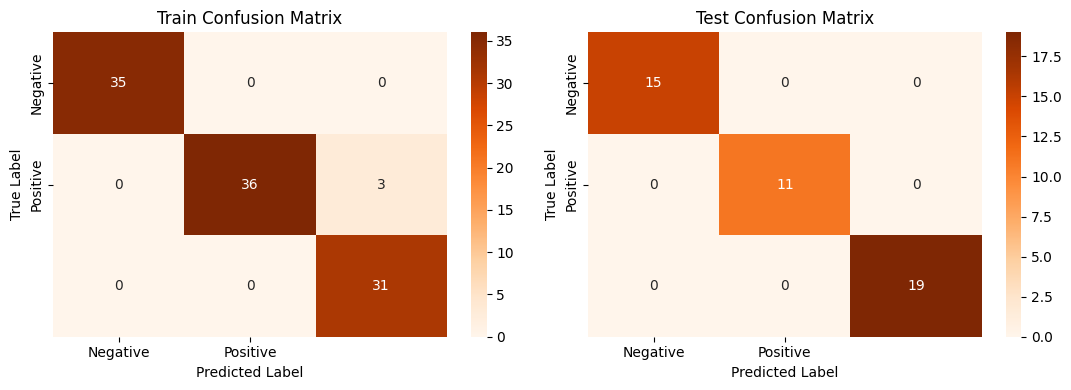


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  35        |
| 1            |    1        | 0.923077 |   0.96     |  39        |
| 2            |    0.911765 | 1        |   0.953846 |  31        |
| accuracy     |    0.971429 | 0.971429 |   0.971429 |   0.971429 |
| macro avg    |    0.970588 | 0.974359 |   0.971282 | 105        |
| weighted avg |    0.97395  | 0.971429 |   0.971516 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        15 |
| 1            |           1 |        1 |          1 |        11 |
| 2            |           1 |        1 |          1 |        19 |
| accuracy     |           1 |        1 |          1 |        

In [ ]:
neural2_score = evaluate_model(nn_model2, x_train, x_test, y_train, y_test)

In [ ]:
score['Neural Network tuned']= neural2_score

In [ ]:
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM,SVM tuned,XGB,XGB tuned,Naive Bayes,Naive Bayes tuned,Neural Network,Neural Network tuned
Precision Train,0.981882,0.971773,1.000000,0.971773,1.000000,0.982107,0.971773,0.990774,1.000000,1.000000,0.980952,0.980952,0.971773,0.973950
Precision Test,0.918753,1.000000,0.911111,0.911111,0.903770,0.891975,0.962393,0.935802,0.875113,0.875113,0.891975,0.891975,1.000000,1.000000
Recall Train,0.980952,0.971429,1.000000,0.971429,1.000000,0.980952,0.971429,0.990476,1.000000,1.000000,0.980952,0.980952,0.971429,0.971429
Recall Test,0.911111,1.000000,0.911111,0.911111,0.888889,0.888889,0.955556,0.933333,0.866667,0.866667,0.888889,0.888889,1.000000,1.000000
Accuracy Train,0.980952,0.971429,1.000000,0.971429,1.000000,0.980952,0.971429,0.990476,1.000000,1.000000,0.980952,0.980952,0.971429,0.971429
Accuracy Test,0.911111,1.000000,0.911111,0.911111,0.888889,0.888889,0.955556,0.933333,0.866667,0.866667,0.888889,0.888889,1.000000,1.000000
F1 macro Train,0.980873,0.971470,1.000000,0.971470,1.000000,0.980999,0.971470,0.990490,1.000000,1.000000,0.980952,0.980952,0.971470,0.971516
F1 macro Test,0.912346,1.000000,0.911111,0.911111,0.890794,0.889803,0.956173,0.933882,0.868519,0.868519,0.889803,0.889803,1.000000,1.000000


In [ ]:
print(score.to_markdown())

|                 |   Logistic regression |   Logistic regression tuned |   Decision Tree |   Decision Tree tuned |   Random Forest |   Random Forest tuned |      SVM |   SVM tuned |      XGB |   XGB tuned |   Naive Bayes |   Naive Bayes tuned |   Neural Network |   Neural Network tuned |
|:----------------|----------------------:|----------------------------:|----------------:|----------------------:|----------------:|----------------------:|---------:|------------:|---------:|------------:|--------------:|--------------------:|-----------------:|-----------------------:|
| Precision Train |              0.981882 |                    0.971773 |        1        |              0.971773 |        1        |              0.982107 | 0.971773 |    0.990774 | 1        |    1        |      0.980952 |            0.980952 |         0.971773 |               0.97395  |
| Precision Test  |              0.918753 |                    1        |        0.911111 |              0.911111 |        0.90377

In [ ]:
score_t = score.transpose()
remove_models = score_t[score_t['Recall Train']>=0.98].index
remove_models

adj = score_t.drop(remove_models)
adj

,Precision Train,Precision Test,Recall Train,Recall Test,Accuracy Train,Accuracy Test,F1 macro Train,F1 macro Test
Logistic regression tuned,0.971773,1.000000,0.971429,1.000000,0.971429,1.000000,0.971470,1.000000
Decision Tree tuned,0.971773,0.911111,0.971429,0.911111,0.971429,0.911111,0.971470,0.911111
SVM,0.971773,0.962393,0.971429,0.955556,0.971429,0.955556,0.971470,0.956173
Neural Network,0.971773,1.000000,0.971429,1.000000,0.971429,1.000000,0.971470,1.000000
Neural Network tuned,0.973950,1.000000,0.971429,1.000000,0.971429,1.000000,0.971516,1.000000


In [ ]:
def select_best_model(df, metrics):

    best_models = {}
    for metric in metrics:
        max_test = df[metric + ' Test'].max()
        best_model_test = df[df[metric + ' Test'] == max_test].index[0]
        best_model = best_model_test
        best_models[metric] = best_model
    return best_models

In [ ]:
metrics = ['Precision', 'Recall', 'Accuracy', 'F1 macro']

best_models = select_best_model(adj, metrics)
print("The best models are:")
for metric, best_model in best_models.items():
    print(f"{metric}: {best_model} - {adj[metric+' Test'][best_model].round(4)}")

The best models are:
Precision: Logistic regression tuned - 1.0
Recall: Logistic regression tuned - 1.0
Accuracy: Logistic regression tuned - 1.0
F1 macro: Logistic regression tuned - 1.0


In [ ]:
score_smpl = score.transpose()
remove_overfitting_models = score_smpl[score_smpl['Recall Train']>=0.98].index
remove_overfitting_models
new_score = score_smpl.drop(remove_overfitting_models)
new_score = new_score.drop(['Precision Train','Precision Test','Accuracy Train','Accuracy Test','F1 macro Train','F1 macro Test'], axis=1)
new_score.index.name = 'Classification Model'
print(new_score.to_markdown())

| Classification Model      |   Recall Train |   Recall Test |
|:--------------------------|---------------:|--------------:|
| Logistic regression tuned |       0.971429 |      1        |
| Decision Tree tuned       |       0.971429 |      0.911111 |
| SVM                       |       0.971429 |      0.955556 |
| Neural Network            |       0.971429 |      1        |
| Neural Network tuned      |       0.971429 |      1        |
